# Boston Housing Project — IBM Skills Network

This notebook completes Tasks 2 and 3 of the Coursera/IBM Skills Network project. It performs descriptive statistics, visualizations, and statistical hypothesis testing on the Boston Housing dataset.

In [1]:

# Import required libraries
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import seaborn as sns

# Display settings
pd.set_option('display.float_format', '{:.3f}'.format)

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

response = requests.get(URL)
response.raise_for_status()  # optional but recommended

boston_df = pd.read_csv(io.BytesIO(response.content))

print("Dataset loaded successfully. Shape:", boston_df.shape)
boston_df.head()


Dataset loaded successfully. Shape: (506, 14)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,4.980,24.000
1,1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,9.140,21.600
2,2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,4.030,34.700
3,3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,2.940,33.400
4,4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,5.330,36.200


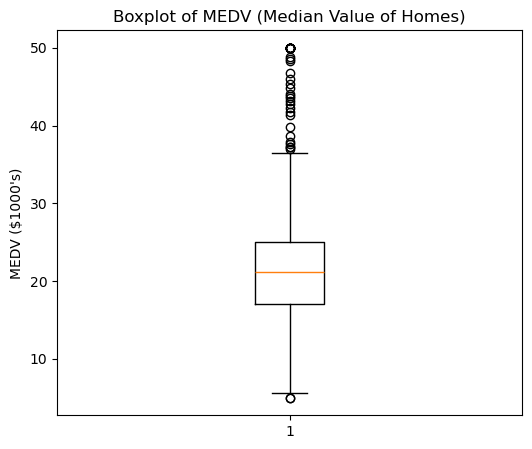

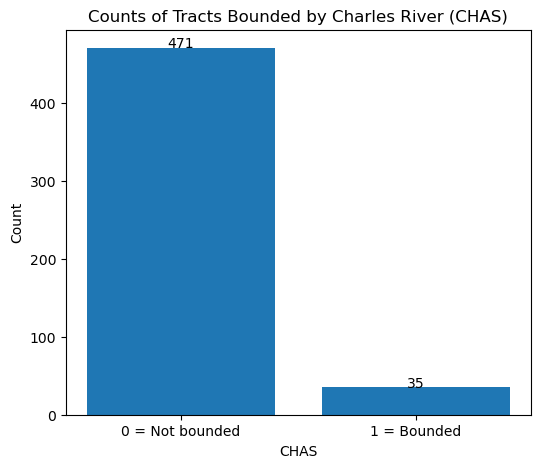

/tmp/ipykernel_22625/354316051.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=age_labels)


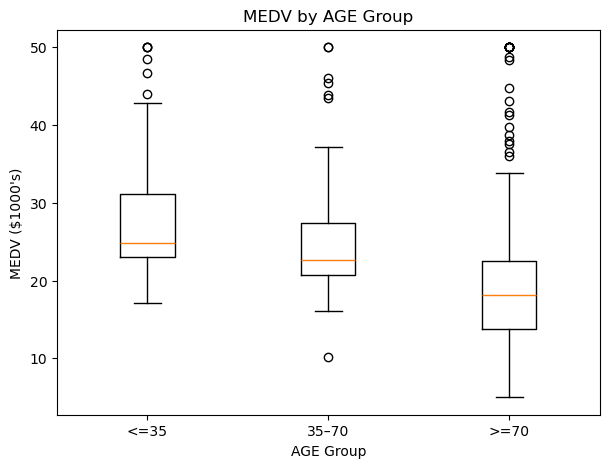

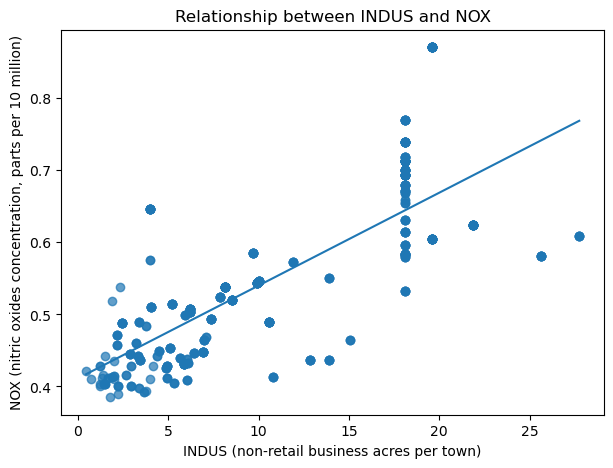

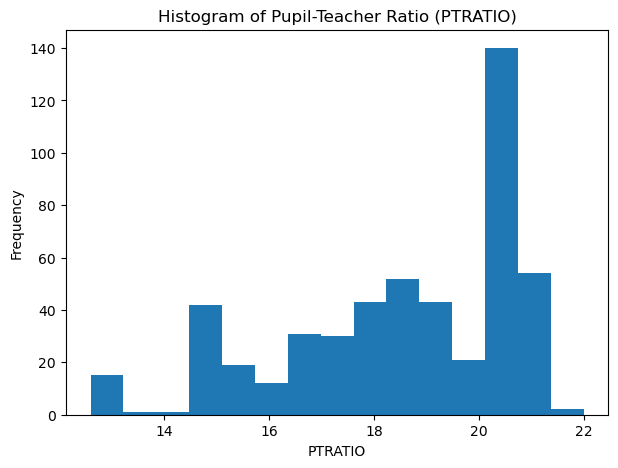

In [3]:

# =========================
# Task 2: Descriptive statistics & visualizations
# =========================

# 2.1 Boxplot for MEDV
plt.figure(figsize=(6,5))
plt.boxplot(boston_df['MEDV'].dropna(), vert=True)
plt.title("Boxplot of MEDV (Median Value of Homes)")
plt.ylabel("MEDV ($1000's)")
plt.show()

# 2.2 Bar plot for CHAS
chas_counts = boston_df['CHAS'].value_counts().sort_index()
plt.figure(figsize=(6,5))
plt.bar(['0 = Not bounded', '1 = Bounded'], chas_counts.values)
plt.title("Counts of Tracts Bounded by Charles River (CHAS)")
plt.ylabel("Count")
plt.xlabel("CHAS")
for i,v in enumerate(chas_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.show()

# 2.3 Boxplot: MEDV vs AGE groups
age_bins  = [-np.inf, 35, 70, np.inf]
age_labels = ['<=35', '35–70', '>=70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(7,5))
data_to_plot = [boston_df.loc[boston_df['AGE_GROUP']==lab, 'MEDV'].dropna() for lab in age_labels]
plt.boxplot(data_to_plot, labels=age_labels)
plt.title("MEDV by AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("MEDV ($1000's)")
plt.show()

# 2.4 Scatter plot: NOX vs INDUS
x = boston_df['INDUS'].values
y = boston_df['NOX'].values
plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.7)
m, c = np.polyfit(x, y, 1)
xline = np.linspace(x.min(), x.max(), 100)
plt.plot(xline, m*xline + c)
plt.title("Relationship between INDUS and NOX")
plt.xlabel("INDUS (non-retail business acres per town)")
plt.ylabel("NOX (nitric oxides concentration, parts per 10 million)")
plt.show()

# 2.5 Histogram: PTRATIO
plt.figure(figsize=(7,5))
plt.hist(boston_df['PTRATIO'].dropna(), bins=15)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()


In [4]:

# =========================
# Task 3: Hypothesis Tests
# =========================

alpha = 0.05

# 3.1 T-test: MEDV by CHAS
group_river = boston_df.loc[boston_df['CHAS']==1, 'MEDV'].dropna()
group_no_river = boston_df.loc[boston_df['CHAS']==0, 'MEDV'].dropna()

t_stat, p_val = stats.ttest_ind(group_river, group_no_river, equal_var=False)
print("\nT-test (MEDV by CHAS):")
print(f"t={t_stat:.3f}, p={p_val:.5f}")
if p_val < alpha:
    print(f"Reject H0 – significant difference in MEDV between CHAS groups.")
else:
    print(f"Fail to reject H0 – no significant difference.")

# 3.2 ANOVA: MEDV across AGE_GROUP
anova_model = smf.ols('MEDV ~ C(AGE_GROUP)', data=boston_df.dropna(subset=['MEDV','AGE_GROUP'])).fit()
anova_table = anova_lm(anova_model, typ=2)
print("\nANOVA (MEDV ~ AGE_GROUP):")
print(anova_table)

p_anova = anova_table['PR(>F)'][0]
if p_anova < alpha:
    print(f"Reject H0 – MEDV differs across AGE groups.")
else:
    print(f"Fail to reject H0 – no significant difference.")

# 3.3 Pearson correlation: NOX vs INDUS
r, p_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson correlation (NOX vs INDUS):")
print(f"r={r:.3f}, p={p_corr:.5f}")
if p_corr < alpha:
    print("Reject H0 – significant linear association.")
else:
    print("Fail to reject H0 – no significant association.")

# 3.4 Regression: MEDV ~ DIS
reg_model = smf.ols('MEDV ~ DIS', data=boston_df.dropna(subset=['MEDV','DIS'])).fit()
print("\nOLS Regression: MEDV ~ DIS")
print(reg_model.summary())



T-test (MEDV by CHAS):
t=3.113, p=0.00357
Reject H0 – significant difference in MEDV between CHAS groups.

ANOVA (MEDV ~ AGE_GROUP):
                sum_sq      df      F  PR(>F)
C(AGE_GROUP)  5401.732   2.000 36.408   0.000
Residual     37314.564 503.000    NaN     NaN
Reject H0 – MEDV differs across AGE groups.

Pearson correlation (NOX vs INDUS):
r=0.764, p=0.00000
Reject H0 – significant linear association.

OLS Regression: MEDV ~ DIS
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           1.21e-08
Time:                        09:53:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df 

/tmp/ipykernel_22625/2897326456.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_anova = anova_table['PR(>F)'][0]
